# Predicting Heart Disease using Machine Learning

This notebook seeks to use different python-based machine learning and data science libraries in an attempt to build a machine
learning model capable of predicting whether or not someone has heart disease based on their medical attributes 

We're going to take the following approach;
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from https://archive.ics.uci.edu/dataset/45/heart+disease which is an open source library.
It is also available from Kaggle. 

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease, then we can proceed with the project

## 4. Features

This gives information about the features and attributes of the data

**Create a Data Dictionary**

![Description](E:/MLProjects/heart-disease-project/dictionary.jpg)

# Preparing the Tools

We're going to use pandas, matplotlib and numpy for analysis and data manipulation

## Importing all the tools we need (Standard Practice)

In [1]:
#Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Make our plots appear on the notebook
%matplotlib inline 

#Models from scikit-learn
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

# Print last updated
import datetime
print(f"Notebook last updated: {datetime.datetime.now()}\n")

# Print versions of libraries we're using (as long as yours are equal or greater than these, your code should work)
print(f"NumPy version: {np.__version__}")
print(f"pandas version: {pd.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")
print(f"Scikit-Learn version: {sklearn.__version__}")

Notebook last updated: 2025-02-14 04:17:07.874099

NumPy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
Scikit-Learn version: 1.5.1


## Load the Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape #Rows & Columns

(303, 14)

## Data Exploration

The Goal is to become a subject matter expert on the data we are exploring and respond to a few questions; 

1. What questions are you trying to solve? 
2. What kind of data do we have, and how do we treat different types?
3. What is missing from the data, and how do we deal with it?
4. Where are the outliers, and why should we even care about them?
5. How can we add, change or remove features to get more out of the data?


In [3]:
df.head() #First 5 records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail () #Last 5 Records

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#We invoke df [target].value_counts() to see how many have heart disease and how many dont as of now

df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
#Let us visualize this using Matplot Lib

df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
#Check different informations about the data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#Check for missing values and sum the columns with missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#We can get some averages and Numerical Data as well
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Finding Patterns in the Data

In [10]:
#1. Comparing the Frequency of Heart Disease Based on Sex

df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [11]:
#2. Compare the Target Column with the Sex Column using Cross Tabs

pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


From our Data, This implies that for the sex 0(Women), have a 72/96 chance of having heart disease; representing a 75% chance; while sex 1(Men), have a 93/207 chance of having heart disease; representing a 45% chance. So basically, if someone comes for screening and they are male, the chance is 45% to be positive, while if they are women, the chance is 75%. 

Combining the two possibilities, one can infer that if anyone (male or female) comes for screening, the chance that they have heart disease is about 62% of the time

In [12]:
#We Can Plot this visualization as follows

pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency for Sex");
plt.xlabel("0=No Heart Disease, 1=Disease");
plt.ylabel("Number of Patients Tested");
plt.legend(["Female","Male"]);
plt.xticks(rotation=0);


# Comparing Several Independent Variables to the Dependent Variable (heart disease)

## We can compare independent variables for Age and Max Heart Rate (Thalach) to the Heart Disease

In [13]:
#We create a plot with two plots inside it. A Bar graph may not be suitable in this case

#Begin with a figure, within which to plot the scatters
plt.figure(figsize=(10,6))

#Do a scatter for positive variables (where heart-rate = 1)
plt.scatter(df.age[df.target==1],df.thalach[df.target==1], color="salmon");

#Do another Scatter for negative variables (where heart-rate = 0)
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], color="lightblue");

#Label and improve on the scatter
plt.title("Heart Disease Frequency for Age and Maximum Heart Rate");
plt.xlabel("Age");
plt.ylabel("Maximum Heart Rate");
plt.legend(["Heart Disease", "No Heart Disease"]);
plt.xticks(rotation=0);


In [14]:
#Check the Distribution of the Age in the Data
df.age.plot.hist();

This indicates a normal distribution (Normal Curve) 

## Comparing Heart Disease Frequency to Chest Pain Type

In [15]:
# We use a Simple Cross-Tab
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


*The Comparison shows a pattern where an increase in CP upto 2, indicates an increase in the heart disease as well

In [16]:
#Plot the Crosstab comparison

pd.crosstab(df.cp,df.target).plot(kind="bar", figsize=(10,6), color=["salmon", "lightblue"]);
plt.title("Chest Pain against Heart Disease");
plt.xlabel("Chest Pain Type");
plt.ylabel("Amount of Pain");
plt.legend(["No Disease", "Disease"]);
plt.xticks(rotation=0);

## Correlation Analysis 

In [17]:
# To Do a correlation, we simply;

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


### Improving the Correlation

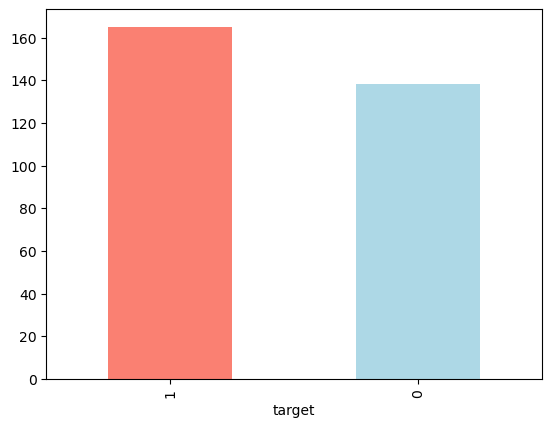

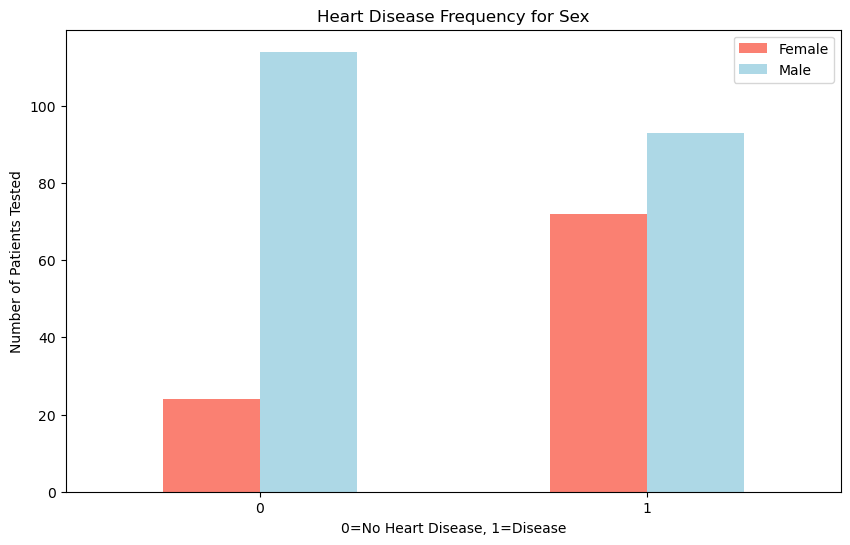

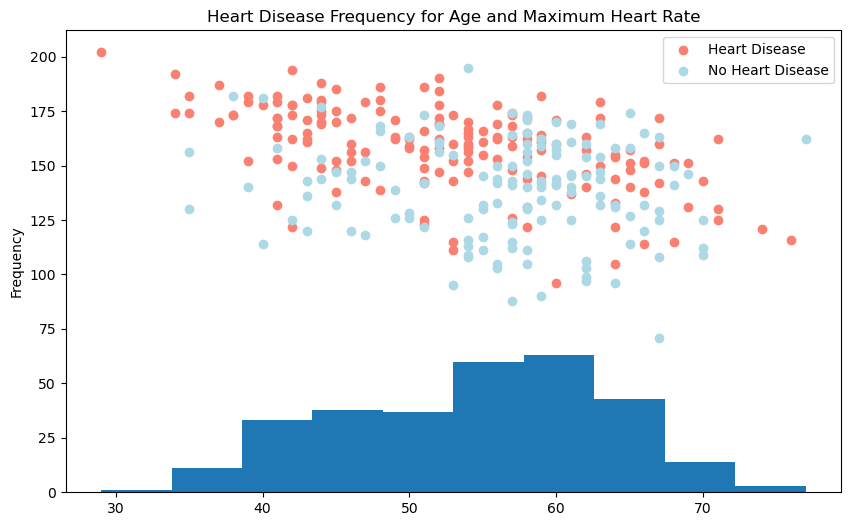

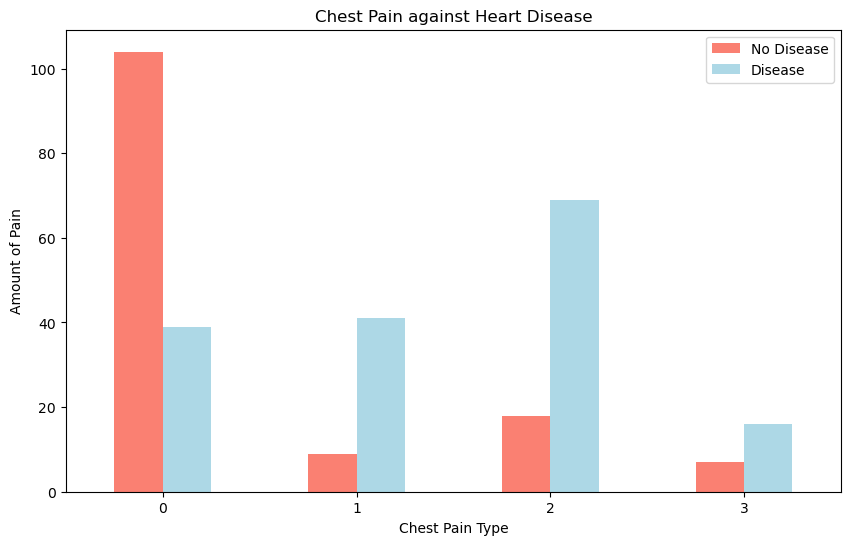

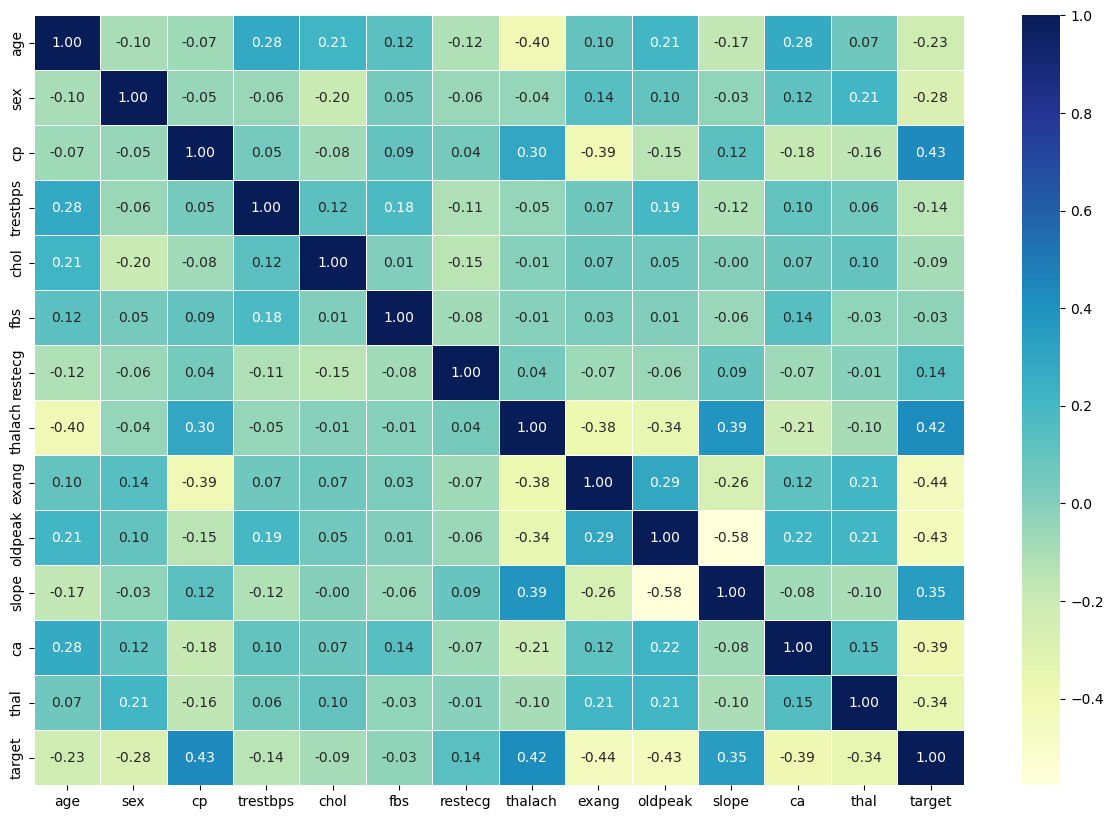

In [18]:
# We use correlation Matrix from Seaborn 
# Compute correlation matrix
corr_matrix = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt=".2f",  
            cmap="YlGnBu",  
            ax=ax)  

plt.show()  # Display the plot

## 5. Modelling

In [19]:
#From our problem statement, we can induce that it is a classification problem
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 5 (a) Split Data into x and y; 


In [20]:
#For classification problems, we need the x variables and the y variable

### We thus split Data into x and y; 

x= df.drop("target", axis=1) #Basically x includes all columns except the target column 
### y is simply the target column
y=df["target"]

### 5 (b) Visualize Both x and y to be certain

In [21]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### 5 (c) Split the data into training and test sets 

In [23]:
#The training set develops the model

#The test set is used for model testing to ensure no bias from the training set 

#Use the numpy random seed to ensure result reproduction in the entire training and testing process

np.random.seed(21) #use the arbitrary seed number repeatedly during entire set

#Use sckit-learn's train-test-split function to achieve the split
X_train, X_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size=0.2)


### 5(d) Visualize the training and testing data again to verify

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
76,51,1,2,125,245,1,0,166,0,2.4,1,0,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3


In [25]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
216,62,0,2,130,263,0,1,97,0,1.2,1,1,3
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [26]:
y_train

281    0
262    0
60     1
76     1
37     1
      ..
188    0
120    1
48     1
260    0
207    0
Name: target, Length: 242, dtype: int64

In [27]:
y_test

219    0
216    0
259    0
179    0
225    0
      ..
44     1
129    1
272    0
9      1
290    0
Name: target, Length: 61, dtype: int64

>The Next Step is to develop a machine learning model
>We will train the model (find patterns in the data) based on the training data, and 
>Test the model (use the patterns) based on the test set 

### 5(e) Choosing the Right Model

# We can go to the scikit-learn machine learning map

<img src="E:/MLProjects/heart-disease-project/choosing-the-right-model.jpg" width="800">




From the Scikit-Learn Map, we have a classification problem (Trying to figure out if someone has heart disease based on their medical parameters)

We need to try out at least 3 different models

The Best Classifiers are the ones to the furthest ends of the tree

>K_Neighbors Classifier
>
>Random Forest Classifier
>
>Logistic Regression
>

While Logistic Regression is not listed among the Classification Models, it is applicable in our case

These are the best possible classifiers we can use

### 5(f) Applying the Models in a Single Function

In [28]:
#The first step is to put all models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}
# Create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    The function will fit and evaluate the given machine learning model
    models: a dictionary of different (in our case 3) scikit-learn machine learning models
    X_train: the training data (with no labels)
    X_test: the testing data (with no labels)
    y_train: the training label (dependent variable)
    y_test: the testing label (dependent variable)
    """
    #make random seed
    np.random.seed(21)
    #make a dictionary to keep the model scores
    model_scores = {}
    #loop through the models
    for name, model in models.items():
        #fit the models to the data
        model.fit(X_train, y_train)
        #evaluate the model and save its scores to model_scores
        model_scores[name]= model.score(X_test, y_test)
    return model_scores

### 5(g) Calling our Function

In [29]:
#We call 'fit_and_score' to return the results of the fitting and testing and assign these to the model_scores dictionary
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
#Now we call the function
model_scores

D:\mini-conda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.819672131147541}

## Model Comparison 

In [30]:
#We compare the models by comparing the values in the function (model_scores) outcome
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
#Now we draw a transposed comparative bar graph
model_compare.T.plot.bar();

The viualized results show that the K-Nearest Neighbors Classification is very ineffective in this case, and thus can be dropped for now

Given that we have our baseline models, it is important to do a few more steps 
* Hyper-parameter tuning
* Feature importance
* Cross-validation
* Prescision 
* Recall 
* F1 Score
* Classification report
* ROC Curve
* Area Under the Curve (AUC)

## Hyper-parameter tuning

In [31]:
#Let's try and tune the KNN Model 

#We create an array of train and test scores
train_scores = []
test_scores = []

#Create a list of different values for n-neighbors
neighbors = range (1, 21)

#set up KNN instance
knn = KNeighborsClassifier()

#Loop through the different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    #Fit the algorithm 
    knn.fit(X_train, y_train)
    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    #Update the test scores
    test_scores.append(knn.score(X_test, y_test))
    

In [32]:
#Let's call the train scores to see what we have 
train_scores

[1.0,
 0.7975206611570248,
 0.7851239669421488,
 0.7603305785123967,
 0.7768595041322314,
 0.7603305785123967,
 0.756198347107438,
 0.731404958677686,
 0.7396694214876033,
 0.7024793388429752,
 0.6942148760330579,
 0.71900826446281,
 0.71900826446281,
 0.71900826446281,
 0.6942148760330579,
 0.6983471074380165,
 0.6983471074380165,
 0.6942148760330579,
 0.6859504132231405,
 0.6942148760330579]

In [33]:
#For the test scores
test_scores

[0.6229508196721312,
 0.47540983606557374,
 0.639344262295082,
 0.6229508196721312,
 0.6065573770491803,
 0.5737704918032787,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6721311475409836,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.7049180327868853,
 0.6885245901639344]

In [34]:
#Let's visualize these scores
plt.plot(neighbors, train_scores, label = "Train Scores")
plt.plot(neighbors, test_scores, label = "Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()
print (f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

Maximum KNN Score on the test data: 72.13%


Clearly, even with tuning, the KNN cannot be useful for our case. We can thus discard it now. However, 
the approach taken here is viable for other cases where KNN is used, and tuned by hand 

## Hyperparameter Tuning using RandomisedSearchCV

We are going to tune
* LogisticRegression ()
* RandomForestClassifier()

  
Using RandomizedSearchCV

The Randomized search cross validation works more like this ; 

<img src="E:/MLProjects/heart-disease-project/cross-validation.jpg" width="800">

## We create hyper-parameter grids for all the models in review

In [35]:
# Hyper-parameter grid for the LogisticRegression Model, based on research to indicate the best parameters for this use case
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"]
}

#Hyper-parameter grid for the RandomForestClassifier Model based on research to indicate the best parameters for this use case
rf_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


Now that we have the hyperparameter grids for each of the models, we tune the parameters using the RandomisedSearchCV

In [36]:
#Tuning the Logistic Regression

#Setup a Random Seed
np.random.seed(21)
#Setup random hyperparameter search for logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions = log_reg_grid, 
                                cv = 5, 
                                n_iter = 20, 
                                verbose= True)

#Fit the hyperparameter search model for the Logistic Regression to the training data
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [37]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [38]:
rs_log_reg.score(X_test, y_test)

0.8032786885245902

Now that we have tuned Logistic Regression, let us do the same to the Random Forest Classifier 

In [39]:
#setup random seed
np.random.seed(21)

#setup random hyperparameter search for Random Forest Classifier
rs_rf = RandomizedSearchCV (RandomForestClassifier (), 
                            param_distributions = rf_grid, 
                            cv = 5, 
                            n_iter = 20, 
                            verbose = 1)

#Fit Random hyperparameter search model for Random Forest Classifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   verbose=1)

In [40]:
rs_rf.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': None,
 'bootstrap': False}

In [41]:
#Evaluating the Randomised Search RandomForestClassifier Model 
rs_rf.score(X_test, y_test)

0.8032786885245902

At this point, we can also eliminate the Random Forest Classifier, considering it performs worse than the Logistic Regression 
model, so that we can now do a grid search as opposed to a random search for the parameters  

## Grid Search Tuning

Let's focus on improving our Logistic Regression using the Grid Search CV. To do so, we need to tune some parameters

In [42]:
# Different hyperparameters for our LogisticRegression Model
log_reg_grid = {"C": np.logspace(-4, 4, 30), 
                "solver": ["liblinear"]
               }

#setup grid hyperparameter search for logistic regression
gs_log_reg = GridSearchCV (LogisticRegression(), param_grid=log_reg_grid, 
                           cv=5, 
                           verbose = True)

#Fit our grid search cv hyperparameter model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [43]:
#Check the best hyperparameters 

gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [44]:
#Evaluate the model 

gs_log_reg.score(X_test, y_test)

0.8032786885245902

compare with the other models 

In [45]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.819672131147541}

## Evaluating our tuned machine learning classifier 

* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score


... Cross validation to be used where possible 

....To make comparisons, we need to make predictions


In [46]:
#Make predictions with tuned model
y_preds =gs_log_reg.predict(X_test)

In [47]:
y_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [48]:
y_test

219    0
216    0
259    0
179    0
225    0
      ..
44     1
129    1
272    0
9      1
290    0
Name: target, Length: 61, dtype: int64

## (a) Plotting the ROC Curve and calculate AUC 


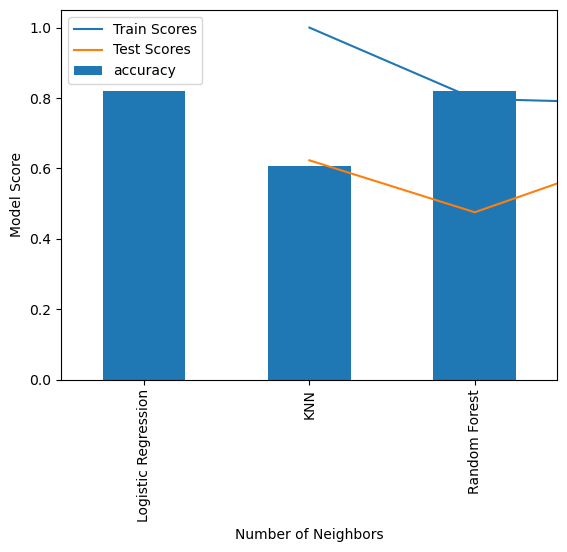

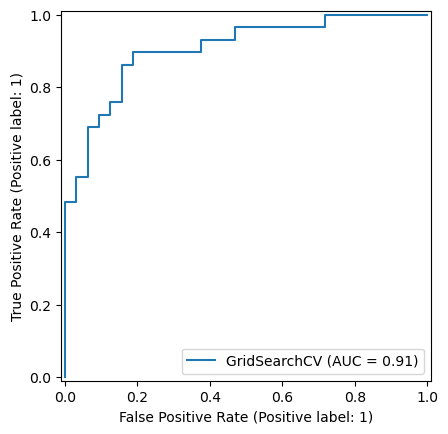

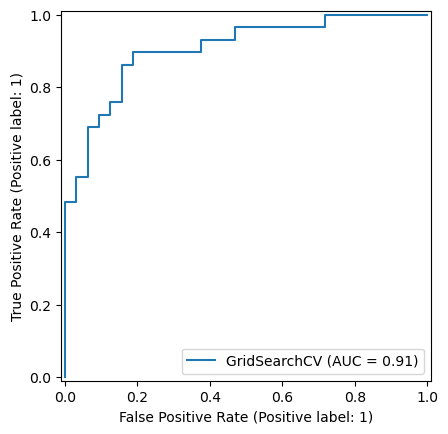

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
plt.show()



## (b) Confusion Matrix 

In [57]:
#Visualize the confusion matrix
print (confusion_matrix(y_test, y_preds))

[[27  5]
 [ 7 22]]


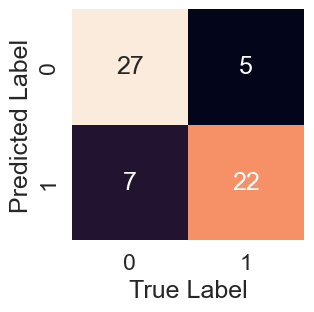

In [62]:
#Plot the matrix 
sns.set(font_scale=1.5)
#we define a function to do this
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax= sns.heatmap(confusion_matrix(y_test, y_preds),
                   annot=True,
                   cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.show()
plot_conf_mat(y_test, y_preds)


## (c) Classification Report 

In [63]:
#Classification report from sklearn.metrics is imported earlier
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.81      0.76      0.79        29

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### Precision
* Precision measures how many of the predicted positive cases are actually positive. It is calculated as TP / (TP + FP). High precision means fewer false positives.

### Recall
* Recall (Sensitivity) measures how many actual positive cases were correctly identified. It is calculated as TP / (TP + FN). High recall means fewer false negatives.

### F1 Score
* The F1 Score is the harmonic mean of precision and recall, balancing both metrics. It is calculated as 2 × (Precision × Recall) / (Precision + Recall). Useful for imbalanced datasets.

### Support
* Support refers to the number of actual occurrences of each class in the dataset. It represents how many true instances exist for each label and helps in evaluating model performance across classes.

### Accuracy
* Accuracy measures the overall correctness of the model, calculated as (TP + TN) / (TP + TN + FP + FN). It works well for balanced datasets but can be misleading in imbalanced cases.

### Macro Average (Macro Avg)
* Macro averaging calculates precision, recall, and F1-score separately for each class and then takes their unweighted mean. It treats all classes equally, making it useful for assessing class imbalance.

### Weighted Average (Weighted Avg)
* Weighted averaging considers the support (number of actual instances per class) when calculating precision, recall, and F1-score. It provides a balanced evaluation, especially for imbalanced datasets.

## Calculating Evaluation Metrics using Cross Validation

### We will calculate

* Accuracy
* Precision
* Recall
* F1 Scores

using the cross validation matrix 'cross_val_score ()' from scikit-learn

In [64]:
#Check best hyper-parameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [66]:
#Create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725,
                        solver ="liblinear")

### (i) Cross-validated Accuracy  

In [67]:
#Ensure to import cross_val_score from sklearn.model_selection
cv_acc = cross_val_score (clf, 
                          x, 
                          y, 
                          cv=5,
                          scoring = "accuracy")
cv_acc                  

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [71]:
# Get the average cross-validated accuracy score and assign it to cv_acc
cv_acc= np.mean(cv_acc)
cv_acc

0.8380874316939891

### (ii) Cross-validated precision

In [72]:
#Cross_val_score is again imported from sklearn.model_selection
cv_precision = cross_val_score (clf, 
                                x,
                                y,
                                cv=5, 
                                scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8154667272314331

### (iii) Cross-validated Recall

In [73]:
cv_recall = cross_val_score (clf, 
                             x, 
                             y, 
                             cv =5, 
                             scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9151515151515153

### (iv) Cross-validated F1-Score

In [74]:
cv_f1 = cross_val_score (clf, 
                             x, 
                             y, 
                             cv =5, 
                             scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8614850462777628

## Visualize the Cross-Validated Metrics

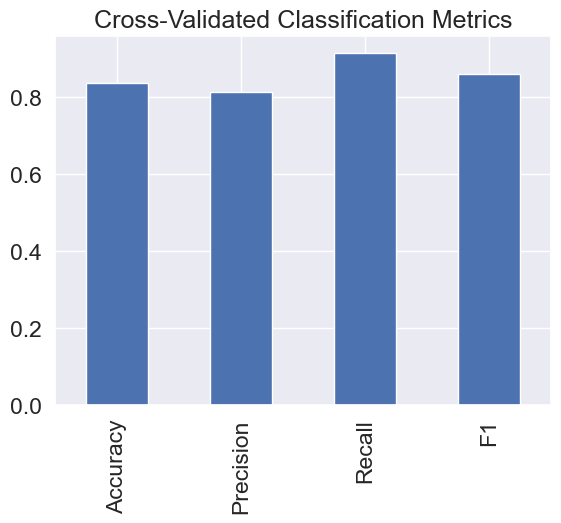

In [80]:
#Define a function using a dataframe to contain all the metrics
cv_metrics = pd.DataFrame ({"Accuracy" : cv_acc, 
                            "Precision": cv_precision, 
                            "Recall": cv_recall, 
                            "F1": cv_f1}, 
                           index = [0])
#Plot a transposed bar graph
plt.show(cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics", 
                        legend = False))

## Feature Importance

* Feature importance is specific for each model. 
* Our model is the Logistic Regression

In [81]:
# Find the best parameters
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [82]:
#Fit the model based on the best parameters
clf=LogisticRegression(C=0.38566204211634725,
                      solver="liblinear")
clf.fit(X_train, y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [83]:
#Check the coefficient, as it is useful for Logistic Regression
clf.coef_

array([[ 9.70951995e-05, -1.14158176e+00,  7.79556357e-01,
        -1.59478249e-02, -3.80490517e-03, -6.87701042e-02,
         2.68806321e-01,  3.61517691e-02, -7.89353523e-01,
        -4.06042015e-01,  4.10665860e-01, -6.38157877e-01,
        -8.38913372e-01]])

In [85]:
#Match coefficients of features to columns by creating a feature dictionary
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 9.709519952666055e-05,
 'sex': -1.1415817587814436,
 'cp': 0.7795563573355415,
 'trestbps': -0.015947824867729547,
 'chol': -0.0038049051668324744,
 'fbs': -0.06877010423561036,
 'restecg': 0.26880632104309293,
 'thalach': 0.03615176911125504,
 'exang': -0.789353522701596,
 'oldpeak': -0.4060420147740531,
 'slope': 0.4106658599470998,
 'ca': -0.6381578770329183,
 'thal': -0.8389133721950716}

* This shows how much each of the columns (features) contribute to the target 

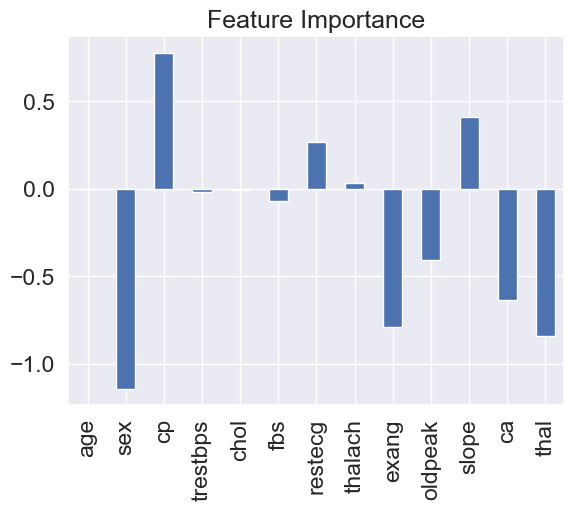

In [87]:
#Visualize Feature Importance
feature_df = pd.DataFrame(feature_dict, index=[0])
plt.show(feature_df.T.plot.bar(title="Feature Importance", 
                      legend = False))

* From the visualization, some of the features have a positive correlation to the target; such as sex, fbs, exang, oldpeak, ca, and thal
* Some features such as cp, restecg, and slope have a positive correlation to the target 